In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/shivang98/Social-Network-ads-Boost/master/Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.shape

(400, 5)

In [ ]:
x = df.iloc[:, 2:4]

In [ ]:
y = df.iloc[:, 4]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [ ]:
clf = LogisticRegression(random_state=0)

In [ ]:
clf.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
pred = clf.predict(x_test)

In [ ]:
pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89        73
           1       0.94      0.66      0.78        47

    accuracy                           0.85       120
   macro avg       0.88      0.82      0.83       120
weighted avg       0.86      0.85      0.84       120



In [ ]:
cm= confusion_matrix(y_test, pred)

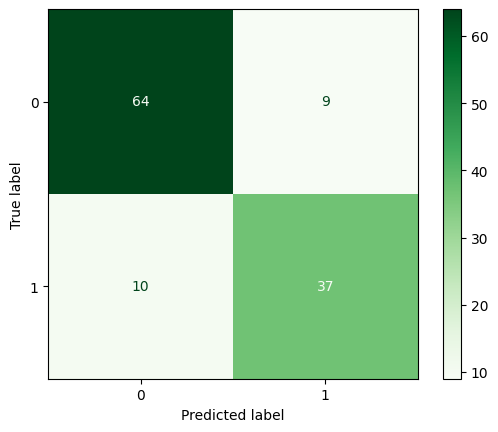

In [ ]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(x_train, y_train)
pred = dtc.predict(x_test)

cm= confusion_matrix(y_test, pred)

conf_matrix = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtc.classes_)
conf_matrix.plot(cmap=plt.cm.Greens)
plt.show()

In [ ]:
tp, fn, fp, tn = confusion_matrix(y_test, pred, labels = [1,0]).reshape(-1)

In [ ]:
print("Accuracy: ", accuracy_score(y_test, pred))
print("Error Rate: ", (fp+fn)/(tp+tn+fp+fn))
print("Recall: ", tp/(tp+fn))
print("Specifity: ", tn/(fp+tn))
print("Prediction: ", tp/(tp+fp))
print("False Positive Rate: ", fp/(tn+fp))

Accuracy:  0.8416666666666667
Error Rate:  0.15833333333333333
Recall:  0.7872340425531915
Specifity:  0.8767123287671232
Prediction:  0.8043478260869565
False Positive Rate:  0.1232876712328767


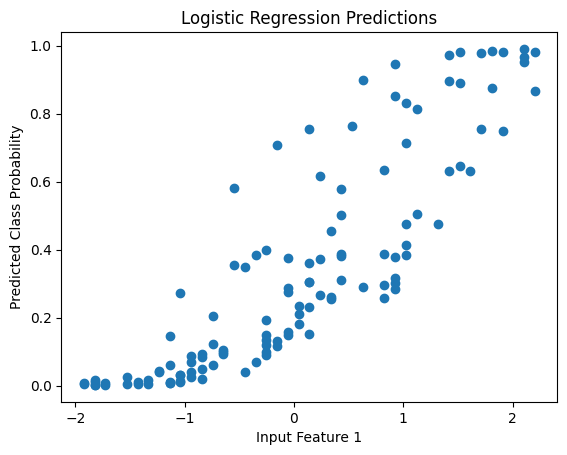

In [ ]:
pred_prob = clf.predict_proba(x_test)[:, 1]

# Plot a scatter plot of the input feature(s) versus the predicted probabilities
plt.scatter(x_test[:, 0], pred_prob)
plt.xlabel('Input Feature 1')
plt.ylabel('Predicted Class Probability')
plt.title('Logistic Regression Predictions')
plt.show()